# Breast Cancer - full robustness evaluation

In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')

## Horizontal subset attack

In [2]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal = results_horizontal.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [3]:
results_horizontal

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,32.0,1.00,1.0,0.0,0.00,NaN,1.0
1,32.0,1.00,1.0,0.9,1.00,NaN,1.0
2,32.0,1.00,1.0,0.8,1.00,NaN,1.0
3,32.0,1.00,1.0,0.7,0.92,NaN,1.0
4,32.0,1.00,1.0,0.6,0.62,NaN,1.0
...,...,...,...,...,...,...,...
124,64.0,1.67,1.0,0.5,1.00,NaN,0.6
125,64.0,1.67,1.0,0.4,1.00,NaN,0.6
126,64.0,1.67,1.0,0.3,1.00,NaN,0.6
127,64.0,1.67,1.0,0.2,1.00,NaN,0.6


In [4]:
sns.set_theme()

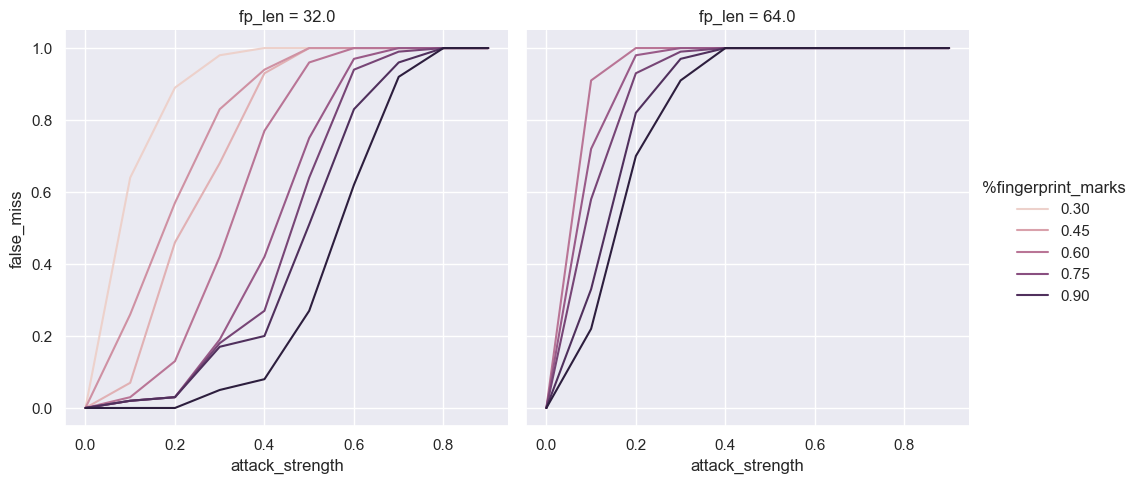

In [5]:
sns.relplot(data=results_horizontal, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_breastcancer.svg')
plt.savefig('figures/robustness_horizontal_breastcancer.png')

### Theoretical estimation

In [6]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal_est/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal_est/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal_est = results_horizontal_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

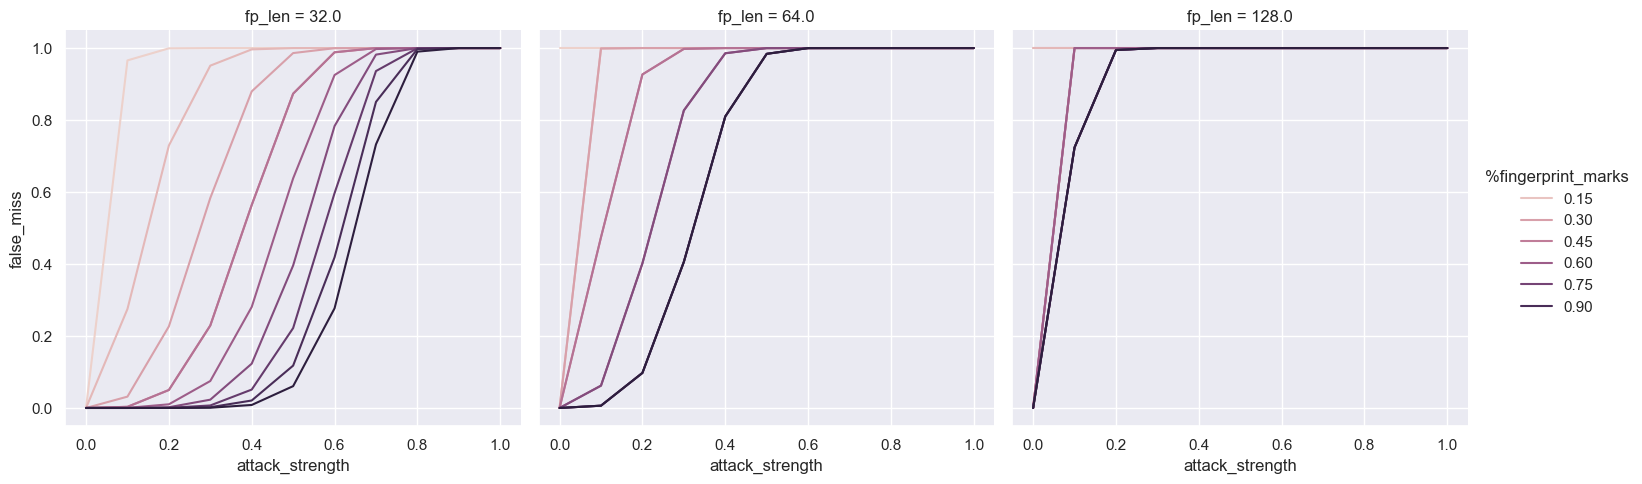

In [7]:
sns.relplot(data=results_horizontal_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_est_breastcancer.svg')
plt.savefig('figures/robustness_horizontal_est_breastcancer.png')

### Comparison: empirical vs theoretical

In [8]:
results_horizontal['type'] = ['empirical' for i in range(len(results_horizontal))]
results_horizontal_est['type'] = ['theoretical' for i in range(len(results_horizontal_est))]

results_horizontal_comp = pd.concat([results_horizontal, results_horizontal_est])

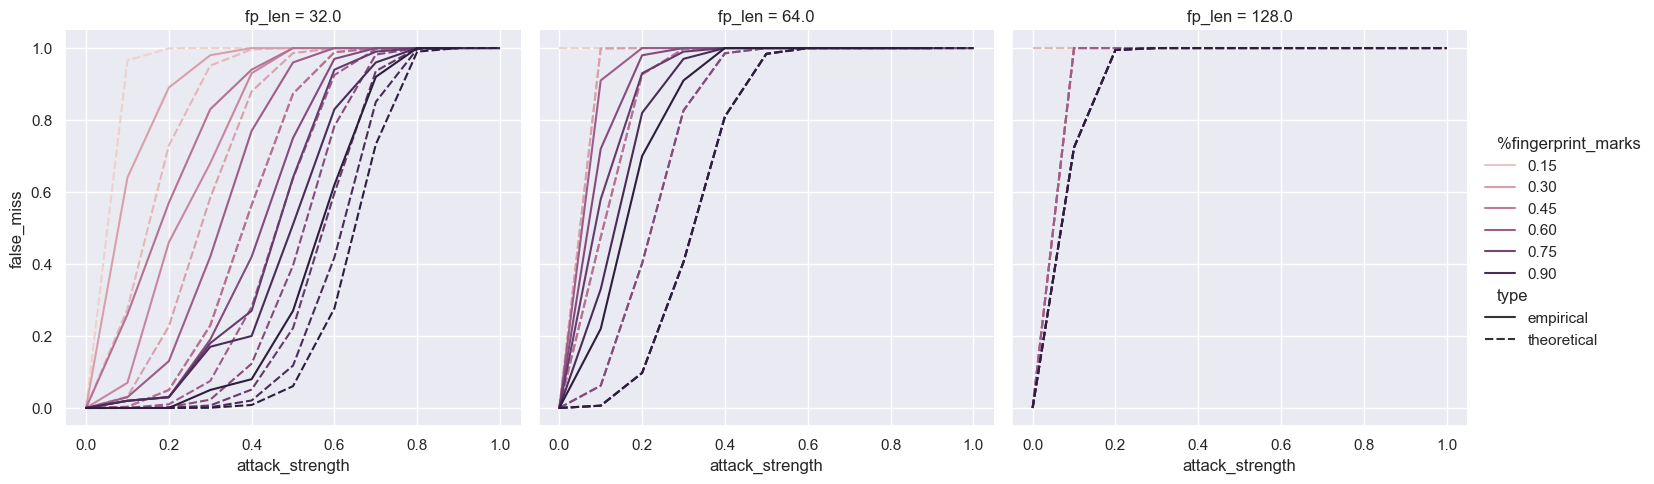

In [9]:
# plot comparison 
sns.relplot(data=results_horizontal_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')

## Vertical attack

In [10]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_vertical = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical = results_vertical.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength_abs': float(key),
                                                    'attack_strength': float(key)/9.0,
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [11]:
results_vertical

,fp_len,gamma,xi,attack_strength,false_miss,misattribution,%fingerprint_marks,attack_strength_abs
0,32.0,1.00,1.0,0.000000,0.0,NaN,1.0,0.0
1,32.0,1.00,1.0,0.888889,1.0,NaN,1.0,8.0
2,32.0,1.00,1.0,0.777778,1.0,NaN,1.0,7.0
3,32.0,1.00,1.0,0.666667,1.0,NaN,1.0,6.0
4,32.0,1.00,1.0,0.555556,1.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...
112,64.0,1.67,1.0,0.555556,1.0,NaN,0.6,5.0
113,64.0,1.67,1.0,0.444444,1.0,NaN,0.6,4.0
114,64.0,1.67,1.0,0.333333,1.0,NaN,0.6,3.0
115,64.0,1.67,1.0,0.222222,1.0,NaN,0.6,2.0


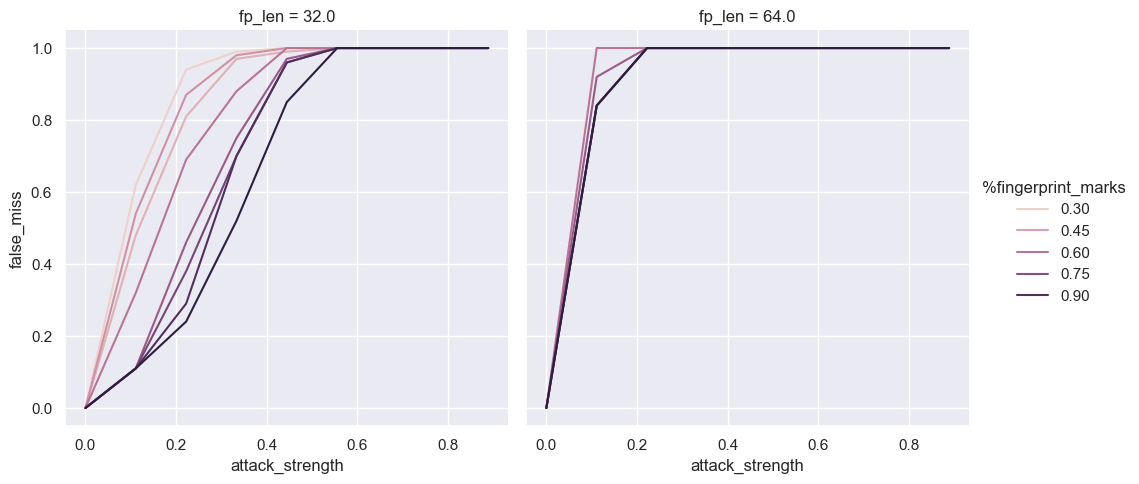

In [12]:
sns.relplot(data=results_vertical, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_vertical_breastcancer.svg')
plt.savefig('figures/robustness_vertical_breastcancer.png')

## Flipping attack

In [13]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


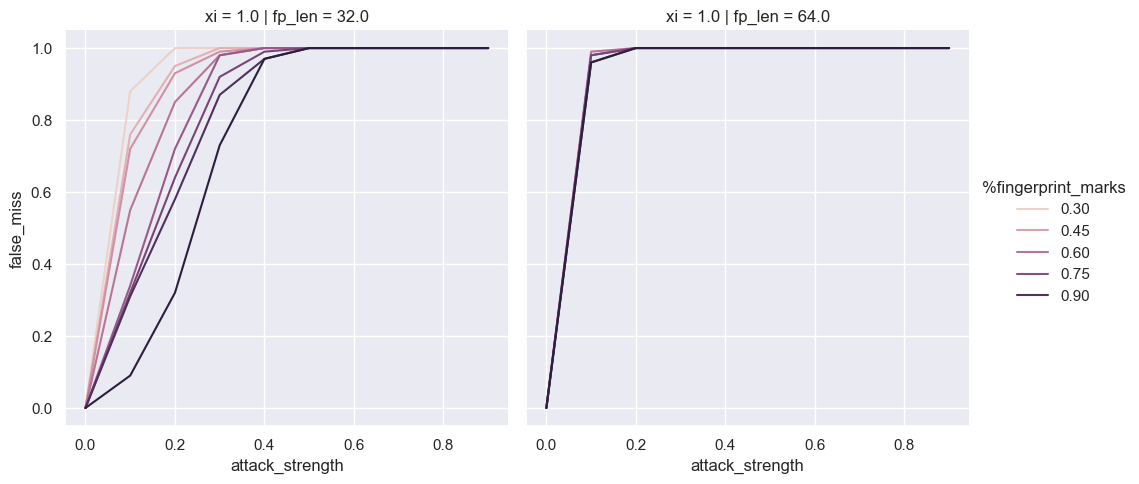

In [14]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_flipping_breastcancer.svg')
plt.savefig('figures/robustness_flipping_breastcancer.png')

## Rounding attack / mode attack

In [15]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/rounding/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/rounding/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


In [16]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_rounding_breastcancer.svg')
plt.savefig('figures/robustness_rounding_breastcancer.png')

ValueError: Could not interpret value `%fingerprint_marks` for parameter `hue`

## Superset attack

In [ ]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [ ]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_superset_breastcancer.svg')
plt.savefig('figures/robustness_superset_breastcancer.png')

## Combination attack

In [ ]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/combination/breastcancer')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/combination/breastcancer/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 



In [ ]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_combination_breastcancer.svg')
plt.savefig('figures/robustness_combination_breastcancer.png')